In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file('../maps/Districts/Census_2011/2011_Dist.shp')
gdf.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [2]:
import yaml
with open('../hces_2023/district_codes.yaml', 'r') as fin:
    district_codes = yaml.safe_load(fin)

In [3]:
df = pd.read_parquet('../hces-2023-24/data/sec-1-HCQ.parquet')
df.head()

,sector,state,district,multiplier,state_name,district_name
hhid,,,,,,
46667201,rural,1,6,16669,Jammu & Kashmir,Rajouri
46667301,rural,1,6,24840,Jammu & Kashmir,Rajouri
46667302,rural,1,6,24840,Jammu & Kashmir,Rajouri
46667303,rural,1,6,24840,Jammu & Kashmir,Rajouri
46667304,rural,1,6,24840,Jammu & Kashmir,Rajouri


In [4]:
for hhid, row in df[df['state_name'] == 'Telangana'].iterrows():
    df.loc[hhid, 'district_name'] = district_codes['Telangana'].get(row['district'], row['district'])

In [5]:
oldf = pd.read_parquet('../hces-2023-24/data/sec-4.1-FDQ.parquet')
oldf['online'] = oldf[[c for c in oldf if c.startswith('online_')]].values.sum(axis=1) > 0
oldf.head()

,used_ration_card,procured_rice,procured_wheat,procured_grain,procured_sugar,procured_pulses,procured_edible_oil,procured_other,online_groceries,online_milkprod,...,online_fruits,online_dryfruits,online_eggfishmeat,online_processed_served,online_processed_packed,online_other,performed_ceremony,meals_served_to_nonhh,multiplier,online
hhid,,,,,,,,,,,,,,,,,,,,,
22300101,no,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,no,5,57436,False
22300201,no,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,no,3,27497,True
22300202,no,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,no,2,27497,False
22300203,no,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,no,3,27497,False
22300204,no,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,no,3,27497,True


In [6]:
df['online'] = oldf['online']

In [7]:
odf = df[df['online']]
ddf = odf.groupby(['state_name', 'district_name'])['multiplier'].sum() / odf['multiplier'].sum()
ddf.sort_values(ascending=False, inplace=True)

In [8]:
ddf

state_name   district_name  
Telangana    Rangareddy         0.071285
Karnataka    Bangalore          0.060563
Maharashtra  Mumbai Suburban    0.057089
             Thane              0.040114
Delhi        North West         0.034112
                                  ...   
Haryana      Kurukshetra        0.000005
Lakshadweep  Lakshadweep        0.000003
Sikkim       North District     0.000003
Tamil Nadu   Pudukkottai        0.000002
Haryana      Yamunanagar        0.000001
Name: multiplier, Length: 484, dtype: float64

In [9]:
gdf.set_index(['ST_NM', 'DISTRICT'], inplace=True, verify_integrity=True)

In [10]:
gdf['online_pc'] = ddf

In [11]:
gdf.head()

,,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,online_pc
ST_NM,DISTRICT,,,,,
Andhra Pradesh,Adilabad,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",NaN
Uttar Pradesh,Agra,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",0.000806
Gujarat,Ahmadabad,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",0.003921
Maharashtra,Ahmadnagar,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",0.000025
Mizoram,Aizawl,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",0.000866


In [13]:
ddf

state_name   district_name  
Telangana    Rangareddy         0.071285
Karnataka    Bangalore          0.060563
Maharashtra  Mumbai Suburban    0.057089
             Thane              0.040114
Delhi        North West         0.034112
                                  ...   
Haryana      Kurukshetra        0.000005
Lakshadweep  Lakshadweep        0.000003
Sikkim       North District     0.000003
Tamil Nadu   Pudukkottai        0.000002
Haryana      Yamunanagar        0.000001
Name: multiplier, Length: 484, dtype: float64

<AxesSubplot:>

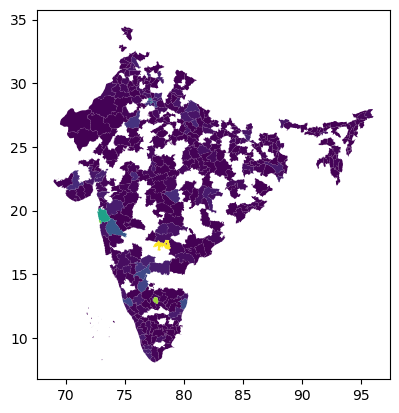

In [23]:
gdf['online_pc'] = ddf.rename(index={'Telangana': 'Andhra Pradesh', 'Delhi': 'NCT of Delhi'}, level=0)
gdf.plot('online_pc')

<AxesSubplot:>

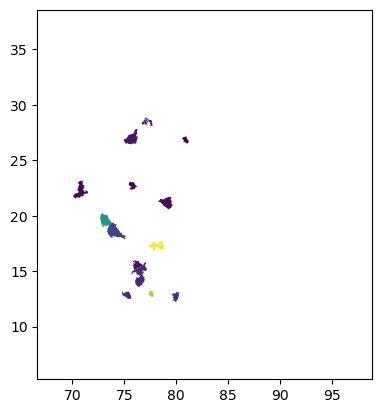

In [42]:
states = gpd.read_file('../maps/States/Admin2.shp')


In [136]:
toplot = gdf.sort_values('online_pc',  ascending=False)['online_pc'].nlargest(20)
toplot = gdf.loc[toplot.index]

ncr_states = ['NCT of Delhi', 'Uttar Pradesh', 'Haryana']


delhi_pc = toplot.loc[ncr_states]['online_pc'].sum()
delhi_geom = toplot.loc[ncr_states].geometry.unary_union
toplot.drop(ncr_states, axis=0, inplace=True)
toplot.loc[('NCT of Delhi', 'Delhi'), 'geometry'] = delhi_geom
toplot.loc[('NCT of Delhi', 'Delhi'), 'online_pc'] = delhi_pc
toplot

/tmp/ipykernel_64720/823484600.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  toplot.drop(ncr_states, axis=0, inplace=True)


ST_CEN_CD  DT_CEN_CD  censuscode  \
ST_NM          DISTRICT                                             
Andhra Pradesh Rangareddy             28.0        6.0       537.0   
Karnataka      Bangalore              29.0       18.0       572.0   
Maharashtra    Mumbai Suburban        27.0       22.0       518.0   
               Thane                  27.0       21.0       517.0   
               Pune                   27.0       25.0       521.0   
Tamil Nadu     Kancheepuram           33.0        3.0       604.0   
Karnataka      Bellary                29.0       11.0       565.0   
               Dakshina Kannada       29.0       21.0       575.0   
               Chitradurga            29.0       12.0       566.0   
Rajasthan      Jaipur                  8.0       12.0       110.0   
Karnataka      Koppal                 29.0        6.0       560.0   
Maharashtra    Nagpur                 27.0        9.0       505.0   
NCT of Delhi   Delhi                   NaN        NaN         NaN   

                                                                          geometry  \
ST_NM          DISTRICT                                                              
Andhra Pradesh Rangareddy        POLYGON ((78.72005 17.66675, 78.71409 17.65164...   
Karnataka      Bangalore         POLYGON ((77.83549 12.86809, 77.83213 12.86372...   
Maharashtra    Mumbai Suburban   POLYGON ((72.95859 18.98734, 72.94677 18.98574...   
               Thane             MULTIPOLYGON (((72.87769 20.22640, 72.88886 20...   
               Pune              POLYGON ((74.83388 18.33920, 74.83266 18.32908...   
Tamil Nadu     Kancheepuram      POLYGON ((80.09392 13.13565, 80.10326 13.13310...   
Karnataka      Bellary           POLYGON ((77.15757 15.13706, 77.15887 15.12597...   
               Dakshina Kannada  MULTIPOLYGON (((75.20194 13.18140, 75.20992 13...   
               Chitradurga       POLYGON ((76.76081 14.98800, 76.76246 14.98450...   
Rajasthan      Jaipur            POLYGON ((76.23110 27.83627, 76.23799 27.84403...   
Karnataka      Koppal            POLYGON ((76.28563 15.90133, 76.28563 15.90133...   
Maharashtra    Nagpur            POLYGON ((79.51189 21.58940, 79.51674 21.58231...   
NCT of Delhi   Delhi             POLYGON ((76.66657 28.37812, 76.67406 28.38000...   

                                 online_pc  
ST_NM          DISTRICT                     
Andhra Pradesh Rangareddy         0.071285  
Karnataka      Bangalore          0.060563  
Maharashtra    Mumbai Suburban    0.057089  
               Thane              0.040114  
               Pune               0.019767  
Tamil Nadu     Kancheepuram       0.016466  
Karnataka      Bellary            0.015331  
               Dakshina Kannada   0.014759  
               Chitradurga        0.014426  
Rajasthan      Jaipur             0.010505  
Karnataka      Koppal             0.009999  
Maharashtra    Nagpur             0.008910  
NCT of Delhi   Delhi              0.148648

/tmp/ipykernel_64720/3942778736.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = toplot.geometry.centroid


Text(80, 37, "Half of India's online shopping happens only in 20 district.\nAnd ~15% of it happens only in Delhi NCR.")

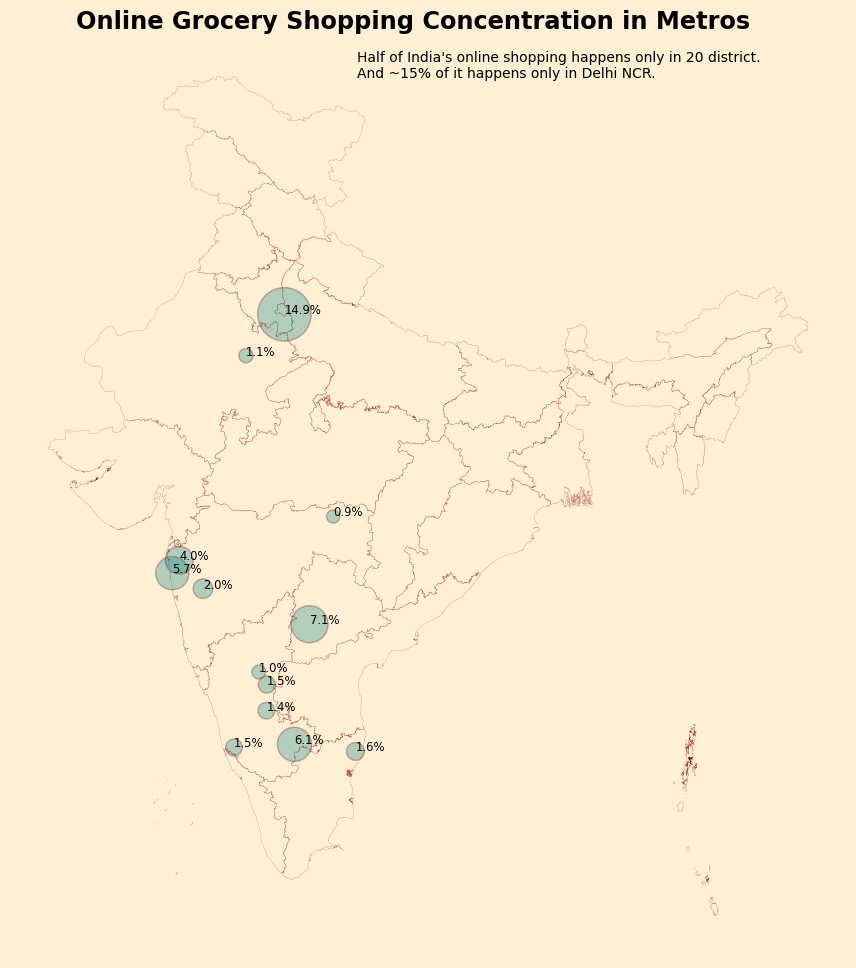

In [162]:
fig, ax = plt.subplots(figsize=(12, 12))

states.plot(ec='maroon', ax=ax, lw=0.1, fc='none')
centroids = toplot.geometry.centroid
centroids.plot(ax=ax, markersize=toplot['online_pc'] * 10000, alpha=0.3, c='Teal', ec='maroon')
# gdf.loc[toplot.index].plot('online_pc', ax=ax)

for ix, row in toplot.iterrows():
    cent = row.geometry.centroid
    ax.text(cent.x, cent.y, f"{(row['online_pc'] * 100):.1f}%", fontsize='small')


ax.set_axis_off()
fig.patch.set_facecolor('papayawhip')
fig.suptitle('Online Grocery Shopping Concentration in Metros', fontsize='xx-large', y=0.9, fontweight='bold')
ax.text(80, 37, 'Half of India\'s online shopping happens in only 20 district.\nAnd ~15% of it happens only in Delhi NCR.')